# Textleser

Im Nachhinein kommt der Textfilter/Datenaufbereiter

In [1]:
%load_ext watermark

## Erforderliche Bibliotheken

Die erforderlichen Bibliotheken sind:

Bibliothek | Nutzen 
---|---
re | RegularExpressions - ist eine Bibliothek die für das Suchen und Ersetzen in Texten genutzt wird
csv | CommaSeparatedValues - ist eine Bibliothek die zum Schreiben und Auswerten von .csv-Dateien genutzt wird.
glob | dient zum Suchen innerhalb eines Dateisystems
difflib | Vergleicht Strings und findet Unterschiede
SpellChecker | Schaut ob Wörter richtig buchstabiert worden sind
regEx_filter | eigens erstellte Bibliothek wo für dieses Tutorial zu komplizierte Funktionen lagern

In [2]:
import re
import csv
import glob
import difflib
from spellchecker import SpellChecker
from Learning_analytics_functions import regEx_filter

Vorbereitung des Rechtschreibprüfers, wir stellen die Sprache auf Deutsch ein

In [3]:
#setze Sprache des Rechtschreibüberprüfers auf Deutsch
spell = SpellChecker(language='de')

Vorbereitung, Erstellung der .csv-Datei, erstellen von Variablen, ggf. Zurücksetzen

In [4]:
test_text = open('Filter_Ergebnisse.csv','w')
csv_writer = csv.writer(test_text)

feature_list = []
falsch_geschrieben_features_list = []

i = 0
itera2 = 0
itera4 = 0
liste_fehlerhafter_buchstaben = []
summierte_liste = 0

## Funktion um eine .txt Dateien auszulesen
'file' ist hierbei ein Platzhalter, welcher durch den Dateinamen den wir der Funktion übergeben ersetzt wird.
beispiel: read_all_lines('test.txt') würde test.txt als Namen an die Funktion übergeben

In [5]:
def read_all_lines(file):
    with open(file, 'rt') as fd:
        #lese den gesamten Inhalt der .txt-Datei und speichere ihn in all_lines ab
        all_lines = fd.readlines()
        # Rückgabewert der Funktion, das ist letzlich der Output
        # Beispiel: wenn wir sagen das wir als Rückgabewert '1' festlegen dann würden wir bei einem Aufruf der Funktion(read_all_lines('test.txt')) auch '1' als Rückmeldung erhalten 
    return all_lines

## Code zum Erhalten der .txt-Dateien
erhalte alle Dateipfade für .txt Dateien am Standort glob.glob(Pfad/*.txt)
mit Pfad ist hierbei der Relative Dateipfad von dieser Datei aus gemeint. In diesem Fall wird auf den Unterordner "test" zugegriffen.
das * steht hierbei für "alle Namen"
.txt ist die Endung der Dateien die wir haben wollen


In [6]:
txt_Dateien = glob.glob("./test/*.txt")

#map ist ein spezielles Objekt: führe die Funktion read_all_lines() auf den txt Dateien aus.(die Liste wo die txt dateien sich befinden wird vorher noch einmal sortiert)
output_strings_map = map(read_all_lines, sorted(txt_Dateien))

#wandle die map in eine list um, da sonst der append Befehl nicht richtig funktioniert
output_strings_list = list(output_strings_map)

while i < len(output_strings_list) :
    #hänge an feature_list das folgende Element an [.append(Element)] das Element mit Index i aus der Liste
    feature_list.append(str(output_strings_list[i]))
    i += 1

#Füge die gesamte List of List zu einer Liste zusammen
output_content = "".join(feature_list)

## Saubermachen der Text Datei

In [7]:
# mithilfe von RegEx alle Satzzeichen und Nummern entfernen und das ganze als Liste zurückgeben
regEx1 = regEx_filter(output_content)

## Raussuchen und Speichern der fehlerhaft eingesetzen Buchstaben

In [8]:
# falsch_geschrieben gibt alle falschgeschriebenen Wörter jeweils einmal zurück
falsch_geschrieben_features = spell.unknown(regEx1) 

#finde heraus wie sich die beiden Wörter unterscheiden
for falsch in falsch_geschrieben_features :
    richtig = spell.correction(falsch)
    unterschiede = difflib.ndiff(richtig, falsch)
    for unterschied in unterschiede :
        #gebe aus wenn es einen Buchstaben als Unterschied gibt
        if re.search('\W', unterschied) != None :
            charakter1 = re.sub('\W','',unterschied)
            charakter = re.sub('\s+','',charakter1)
            falsch_geschrieben_features_list.append(charakter)

#lösche doppelte Buchstaben und gebe das ganze als sortierte Liste zurück
falscher_Buchstabe = sorted(list(set(falsch_geschrieben_features_list)))

## Erstellen des Headers der .csv-Datei

In [9]:
Titel = ['Text_Autor', 'Summe_Wörter', 'Fehler_anzahl', 'prozentualer_Fehleranteil']

for obj in falscher_Buchstabe :
    Titel.append(obj)

#schreibe die erste Reihe - hierbei müssen alle Rechtschreibfehler als features reingeschrieben werden

csv_writer.writerow(Titel)

125

## Auswertung der einzelnen .txt-Dateien
Die Ausgabe gibt den Namen und danach die Fehler pro Absatz innerhalb der .txt-Datei aus

In [10]:
while itera4 < len(falscher_Buchstabe):
    itera4 += 1
    liste_fehlerhafter_buchstaben.append(0)

while itera2 < len(txt_Dateien) :
    print(txt_Dateien[itera2])
    output_strings = read_all_lines(txt_Dateien[itera2])
    summierte_liste = 0
    #Schleife um die List of List durchzugehen, jede Line enthält den Eintrag eines kompletten Dokumentes
    for line in output_strings :
        kommalines = regEx_filter(line)
        summierte_liste += len(kommalines)
        # Überprüfen mithilfe von Pyspellchecker
        falsch_geschrieben = spell.unknown(kommalines)
        for falsch in falsch_geschrieben :
            #gebe die wahrscheinlichsten Worte raus
            richtig = spell.correction(falsch)
            #gebe die Buchstabenunterschiede aus(vergleiche die Strings und gebe Unterschiede aus)
            unterschiede = difflib.ndiff(richtig, falsch)
            for unterschied in unterschiede :
                #gebe aus wenn es einen Buchstaben als Unterschied gibt(bei der difflib Funktion wird das ganze mit einem + bzw. - vor dem Buchstaben notiert)
                if re.search('\W', unterschied) != None :
                    #entferne alle Satzzeichen und Nummern
                    charakter1 = re.sub('\W','',unterschied)
                    #entferne alle Leerstellen
                    charakter = re.sub('\s+','',charakter1)
                    iterator3 = 0
                    #für jeden Buchstaben bei allen falschen Buchstaben
                    for Element in falscher_Buchstabe:
                        #vergleiche jeden Buchstaben mit den Fehlerhaften Buchstaben                    
                        if Element == charakter:
                            #wenn das zutrifft: erhöhe an der Stelle iterator3 in der Liste um 1                        
                            liste_fehlerhafter_buchstaben[iterator3] += 1
                        iterator3 += 1
        print(sum(liste_fehlerhafter_buchstaben)/2)        
        prozent = len(falsch_geschrieben)/summierte_liste
    
        Zeilen_Inhalt = [txt_Dateien[itera2], summierte_liste, len(falsch_geschrieben), prozent]
    # 
    for x in liste_fehlerhafter_buchstaben :
        Zeilen_Inhalt.append(x/2)
    
    csv_writer.writerow(Zeilen_Inhalt)
    # Gebe Ergebnis in .csv Datei aus - Hänge Fehler und Dateinamen darin an, gebe Fehler summiert / gesamtwortzahl aus

    # Nach dem beschreiben der .csv Datei
    itera2 += 1
    itera4 = 0
    #setze die Liste fehlerhafter Buchstaben zurück für die nächste txt datei
    while itera4 < len(falscher_Buchstabe):        
        liste_fehlerhafter_buchstaben[itera4] = 0
        itera4 += 1

#schliesse die csv Datei
test_text.close()
print('Fertig!')

./test/Klaus.txt
71.0
71.0
97.5
./test/Corry.txt
41.0
41.0
60.0
./test/Lea.txt
84.0
84.0
148.0
./test/Oscar.txt
64.0
64.0
95.0
./test/Julia.txt
45.5
45.5
125.5
./test/Emil.txt
105.5
105.5
205.5
./test/Gabriel.txt
69.5
69.5
154.5
./test/Joachim.txt
57.5
57.5
70.0
./test/Gabriella.txt
52.5
52.5
95.5
./test/Mariah.txt
58.5
58.5
146.5
./test/Kayle.txt
19.0
19.0
124.0
./test/Kay.txt
119.5
119.5
199.5
./test/Nancy.txt
46.0
46.0
100.0
./test/Nelson.txt
46.0
46.0
92.0
./test/Martina.txt
50.0
50.0
94.0
./test/Ben.txt
58.0
58.0
97.5
./test/Karla.txt
53.5
53.5
88.0
./test/Carlos.txt
45.5
45.5
107.0
./test/Andreas.txt
56.0
56.0
100.0
./test/Mike.txt
37.5
37.5
84.0
./test/Tim.txt
57.5
57.5
70.0
./test/Emilia.txt
76.0
76.0
153.0
./test/Tina.txt
56.0
56.0
97.0
./test/Marius.txt
33.5
33.5
114.5
./test/Max.txt
15.0
15.0
116.0
./test/Susanne.txt
112.0
112.0
178.0
./test/Marian.txt
84.5
84.5
93.0
./test/Joanna.txt
85.5
85.5
113.5
./test/Ferdinand.txt
24.0
24.0
98.5
./test/Julius.txt
19.5
19.5
77.5
Fertig

# Machinelearning-Algorithmen
Im Nachfolgenden wurden der K-Means Algorithmus und der Hierarchical Agglomerative Clustering Algorithmus von Scikitlearn genutzt um unsere zuvor aufbereiteten Daten auszuwerten.

In [11]:
#Bibliothek zum importieren von .csv dateien
import pandas as pd

#Bibliothek für Arrays
import numpy

#Bibliothek für die grafische Darstellung der Ergebnisse
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

#Kmeans algorithmus
from sklearn.cluster import KMeans
from sklearn import preprocessing as prep
#HAC
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph


Lese die .csv-Datei aus und mache sie für die Algorithmen lesbar

In [12]:
data = pd.read_csv('Filter_Ergebnisse.csv')

data2 = data.loc[:, ~data.columns.isin(['Text_Autor'])]

data_array = data2.to_numpy()

## K-means
zunächst initiieren wir den Skalierer mit .Standardscaler, diesen benötigen wir damit die verschiedenen Eigenschaften der .csv-Datei richtig ausgelesen werden können und nicht alles durch die maximale Wortanzahl/Fehleranzahl dominiert wird.

Danach wird das K-Means Verfahren mit 3 Clustern initiiert.

Zum Schluss werden die Ergebnisse des K-Means Verfahrens aka die vom Algorithmus getroffenen Zuordnungen in der Variable y_km gespeichert.

In [13]:
data_skaliert = prep.StandardScaler().fit_transform(data_array)

kmeans = KMeans(n_clusters=3, random_state=2).fit(data_skaliert)
y_km = kmeans.predict(data_skaliert)


## Ergebnissicherung K-Means
Mithilfe von Pandas Datenrahmen werden die Ergebnisse Spaltenweise zusammengefügt und in einer .csv abgespeichert

In [14]:
Namensschild_Datenrahmen = pd.DataFrame(kmeans.labels_)
Fehleranteil_Datenrahmen = pd.DataFrame(data.prozentualer_Fehleranteil)
Autor_Datenrahmen = pd.DataFrame(data.Text_Autor)

Ergebnis_Datenrahmen1 = Autor_Datenrahmen.join(Fehleranteil_Datenrahmen)
Ergebnis_Datenrahmen = Ergebnis_Datenrahmen1.join(Namensschild_Datenrahmen)

Ergebnis_Datenrahmen.to_csv('Ergebnis_KMeans.csv')

## Grafische Darstellung von K-Means Ergebnissen

Im Nachhinein wird mithilfe von 2-Dimensionalen Plots die getroffene Einordnung durch K-Means und die PLatzierung der Centroids dargestellt.

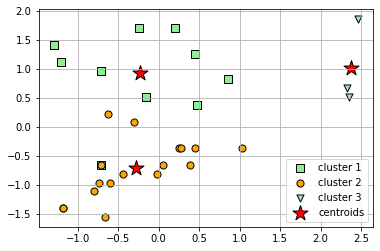

In [15]:
# Zeichne die 3 verschiedenen Cluster
plt.scatter(
    data_skaliert[y_km == 0, 0], data_skaliert[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data_skaliert[y_km == 1, 0], data_skaliert[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data_skaliert[y_km == 2, 0], data_skaliert[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


## Hierarchical Agglomerative Clustering
Ab hier beginnt das Hierarchical Agglomerative Clustering

Zunächst muss man hierbei angeben wie die unterschiedlichen Daten zusammengefasst werden. Hierzu wird die Funktion kneighbors_graph verwendet, welcher den einzelnen Samples eine Gewichtung gibt.

Danach wird das Agglomerative Clustering gestartet.

In [16]:
connectivity = kneighbors_graph(data_skaliert, n_neighbors=2, include_self=False)

ward = AgglomerativeClustering(
    n_clusters=8, connectivity=connectivity, linkage="ward").fit(data_skaliert)

label = ward.labels_

/home/richardpi/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:280: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


## Grafische Darstellung der Ergebnisse
Die Ergebnisse des HAC's werden als 3-Dimensionale Grafik ausgegeben. (Diese kann innerhalb des Jupiter Notebooks nicht bewegt werden, jedoch kann sie ausserhalb bewegt werden.)

/tmp/ipykernel_14219/788103042.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axis = p3.Axes3D(fig)


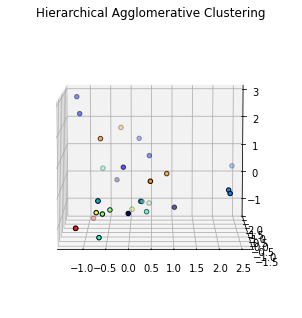

In [17]:
fig = plt.figure()
axis = p3.Axes3D(fig)
axis.view_init(8, -90)
for l in numpy.unique(label):
    axis.scatter(
        data_skaliert[label == l, 0],
        data_skaliert[label == l, 1],
        data_skaliert[label == l, 2],
        color=plt.cm.jet(float(l) / numpy.max(label + 1)),
        s=20,
        edgecolor="k",
    )
plt.title("Hierarchical Agglomerative Clustering")
plt.show()


## Ergebnissicherung HAC

Die Daten werden nun wieder in einen Pandas Datenrahmen geschrieben und danach an die ursprüngliche .csv-Datei angehangen.

In [18]:
HAC_Datenrahmen = pd.DataFrame(label)
HAC_Ergebnisse = data.join(HAC_Datenrahmen)

HAC_Ergebnisse.to_csv('Ergebnis_HAC.csv')